# Network Analysis and Visualisation

This tutorial will help you answer questions such as:

- How to make a network from texts and social media data
- What is the overall structure of the network?
- What are the important nodes, or hubs, in the network?
- What are the subgroups and communities in the network?


## (Social) Network Theory

In [ ]:
## Making a network from plays and texts
Text Moretti

In [73]:
from lxml import etree
with open('data/macbeth.xml') as input_xml:
    tree = etree.parse(input_xml)
speakers = tree.findall('.//SPEAKER')

In [74]:
names = [s.text for s in speakers]
print(names[:10])

['First Witch', 'Second Witch', 'Third Witch', 'First Witch', 'Second Witch', 'Third Witch', 'First Witch', 'Second Witch', 'Third Witch', 'ALL']


In [75]:
def clean_name(name):
    return ''.join(ch for ch in name if ch.isalpha()).lower()

In [76]:
clean_names = [clean_name(name) for name in names]
print(clean_names[:10])

['firstwitch', 'secondwitch', 'thirdwitch', 'firstwitch', 'secondwitch', 'thirdwitch', 'firstwitch', 'secondwitch', 'thirdwitch', 'all']


In [136]:
import nltk
names_bigrams = [(n2,n1) for (n1,n2) in list(nltk.bigrams(clean_names))]

In [137]:
nodes = set(clean_names)
edges = set(names_bigrams)

In [138]:
import networkx as nx
G = nx.DiGraph()

In [139]:
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [140]:
nx.write_gexf(G,'data/characternetwork.gexf')

In [141]:
from collections import Counter
edges = [(n1,n2,{'weight': freq}) for (n1,n2), freq in Counter(names_bigrams).items()]

In [142]:
edges[:10]

[('secondwitch', 'firstwitch', {'weight': 12}),
 ('thirdwitch', 'secondwitch', {'weight': 10}),
 ('firstwitch', 'thirdwitch', {'weight': 8}),
 ('all', 'thirdwitch', {'weight': 4}),
 ('duncan', 'all', {'weight': 1}),
 ('malcolm', 'duncan', {'weight': 3}),
 ('sergeant', 'malcolm', {'weight': 1}),
 ('duncan', 'sergeant', {'weight': 3}),
 ('sergeant', 'duncan', {'weight': 2}),
 ('lennox', 'malcolm', {'weight': 2})]

In [143]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.write_gexf(G,'data/characternetwork_weights.gexf')

In [144]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
plt.rcParams["figure.figsize"] = [16.0,10.0]

[16.0, 10.0]


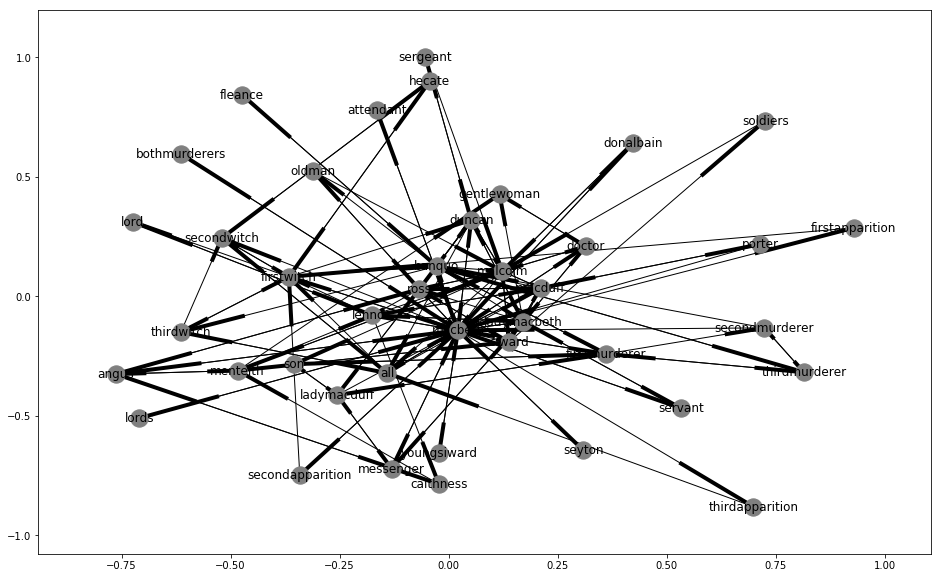

In [145]:
positions = nx.spring_layout(G,k=0.5,iterations=20)
nx.draw_networkx_nodes(G,pos=positions,node_color = 'grey')
nx.draw_networkx_edges(G,pos=positions)
nx.draw_networkx_labels(G,pos=positions,font_color='k')
plt.show()

In [146]:
centrality = nx.degree_centrality(G)
print(centrality)

{'ross': 0.5, 'messenger': 0.15000000000000002, 'thirdapparition': 0.05, 'soldiers': 0.05, 'son': 0.125, 'all': 0.275, 'macduff': 0.4, 'donalbain': 0.1, 'ladymacbeth': 0.42500000000000004, 'secondmurderer': 0.125, 'thirdwitch': 0.15000000000000002, 'porter': 0.07500000000000001, 'ladymacduff': 0.225, 'youngsiward': 0.05, 'oldman': 0.1, 'lennox': 0.325, 'banquo': 0.47500000000000003, 'duncan': 0.35000000000000003, 'macbeth': 1.2000000000000002, 'caithness': 0.1, 'secondapparition': 0.07500000000000001, 'siward': 0.25, 'doctor': 0.2, 'bothmurderers': 0.05, 'sergeant': 0.07500000000000001, 'malcolm': 0.55, 'angus': 0.2, 'lords': 0.05, 'seyton': 0.05, 'attendant': 0.05, 'gentlewoman': 0.1, 'firstapparition': 0.05, 'thirdmurderer': 0.15000000000000002, 'hecate': 0.1, 'servant': 0.1, 'firstwitch': 0.375, 'fleance': 0.05, 'lord': 0.07500000000000001, 'firstmurderer': 0.275, 'menteith': 0.225, 'secondwitch': 0.2}


In [149]:
centrality = nx.in_degree_centrality(G)
print(centrality)

{'ross': 0.25, 'messenger': 0.07500000000000001, 'thirdapparition': 0.025, 'soldiers': 0.025, 'son': 0.07500000000000001, 'all': 0.15000000000000002, 'macduff': 0.2, 'donalbain': 0.05, 'ladymacbeth': 0.2, 'secondmurderer': 0.05, 'thirdwitch': 0.07500000000000001, 'porter': 0.025, 'ladymacduff': 0.1, 'youngsiward': 0.025, 'oldman': 0.05, 'lennox': 0.15000000000000002, 'banquo': 0.225, 'duncan': 0.17500000000000002, 'macbeth': 0.6000000000000001, 'caithness': 0.05, 'secondapparition': 0.025, 'siward': 0.125, 'doctor': 0.1, 'bothmurderers': 0.025, 'sergeant': 0.025, 'malcolm': 0.30000000000000004, 'angus': 0.1, 'lords': 0.025, 'seyton': 0.025, 'attendant': 0.025, 'gentlewoman': 0.07500000000000001, 'firstapparition': 0.025, 'thirdmurderer': 0.07500000000000001, 'hecate': 0.05, 'servant': 0.05, 'firstwitch': 0.2, 'fleance': 0.025, 'lord': 0.05, 'firstmurderer': 0.125, 'menteith': 0.1, 'secondwitch': 0.125}


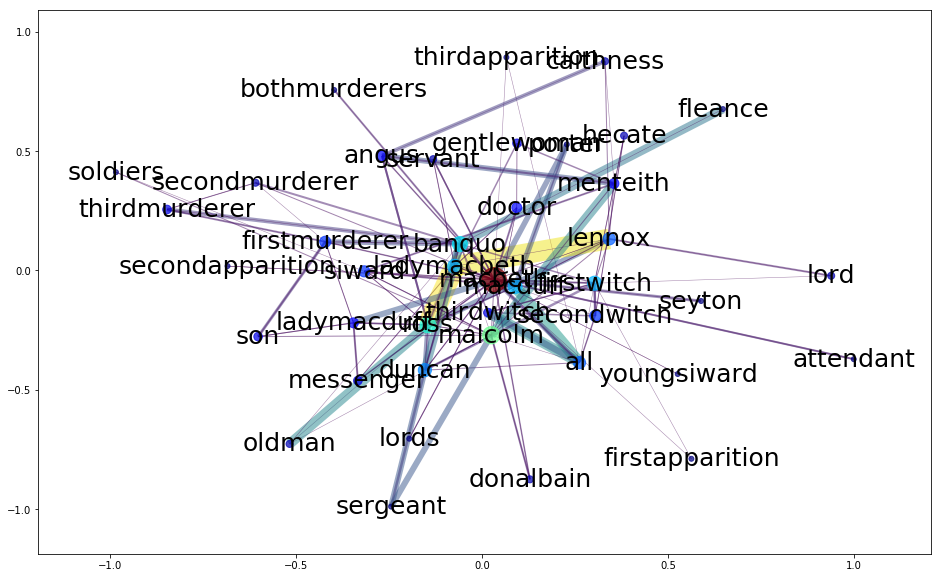

In [152]:
edges_counter = Counter(names_bigrams)
positions = nx.spring_layout(G,k=0.5,iterations=20,weight='weight')
nx.draw_networkx_nodes(G,pos=positions,
                       nodelist=list(centrality.keys()),
                       cmap='jet',
                       node_size = [v*1000 for v in list(centrality.values())],
                       node_color = [v for v in list(centrality.values())],
                      alpha=0.7)



nx.draw_networkx_edges(G,pos=positions,
                       edges=list(edges_counter.keys()),
                       width = [w/2 for w in edges_counter.values()],
                       edge_color=list(edges_counter.values()),
                       arrows=False,
                       alpha=0.5
                      )
nx.draw_networkx_labels(G,pos=positions,font_color='k',font_size=25)
plt.show()

In [ ]:
## Word Co-occurence networks

In [156]:
text = open('data/communist_manifesto.txt','rt',encoding='utf-8').read()

In [228]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.util import ngrams
tokens = word_tokenize(text)
tokens[:5]

['PREFACE', 'The', '``', 'Manifesto', "''"]

In [229]:
pos_tagged_text = nltk.pos_tag(tokens)

In [230]:
pos_tagged_text[:10]

[('PREFACE', 'VB'),
 ('The', 'DT'),
 ('``', '``'),
 ('Manifesto', 'NNP'),
 ("''", "''"),
 ('was', 'VBD'),
 ('published', 'VBN'),
 ('as', 'IN'),
 ('the', 'DT'),
 ('platform', 'NN')]

In [241]:
filtered_by_noun = [w.lower() for w,t in pos_tagged_text if t.startswith('NN')]
nodes = set(filtered_by_noun)

In [279]:
from collections import defaultdict

mapping = defaultdict(Counter)

five_grams_generator = ngrams(filtered_by_noun,n=5)

for fivegram in five_grams_generator:
    fivegram = list(fivegram)
    center = fivegram[2]
    fivegram.remove(center)
    mapping[center]+=Counter(set(fivegram))
    

In [265]:
fd = Counter(filtered_by_noun)
tot = len(filtered_by_noun)

In [281]:
import numpy as np
from itertools import combinations

def pmi(w1,w2):
    nom = mapping[w1][w2]/tot
    denom = (fd[w1]/tot)*(fd[w2]/tot)
    return np.log(nom/denom)

In [282]:
pmi('class','bourgeois')

1.4690851852513203

In [292]:
most_common_nouns = [w for (w,v) in fd.most_common(100)]
    
comb2pmi = {}    

for w1,w2 in combinations(most_common_nouns,2):
    pmi_score = pmi(w1,w2)
    if isinstance(pmi_score,float) and not np.isneginf(pmi_score):
        comb2pmi[(w1,w2)] = pmi_score

/Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [295]:
list(comb2pmi.items())[:10]

[(('class', 'bourgeoisie'), 1.3409851826240045),
 (('class', 'society'), 1.3092364843094242),
 (('class', 'bourgeois'), 1.4690851852513203),
 (('class', 'proletariat'), 2.0595420787093182),
 (('class', 'production'), 0.038773938714655141),
 (('class', 'property'), 0.97276424768821113),
 (('class', 'conditions'), 1.2101455816651931),
 (('class', 'labor'), 0.93194225316795609),
 (('class', 'development'), 2.0023836648693694),
 (('class', 'capital'), 0.6160893037494789)]

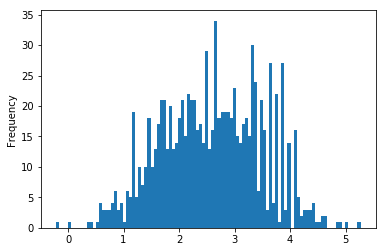

In [306]:
import pandas as pd
%matplotlib inline
pd.Series(list(comb2pmi.values())).plot(kind='hist',bins=100)

In [309]:
edges = []
thresold = 3.0
for ((w1,w2),pmi_score) in comb2pmi.items():
    if pmi_score > thresold:
        edges.append((w1,w2,{'weight':pmi_score}))
print(len(edges))

335


In [310]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [311]:
nx.write_gexf(G,'data/cooccurence_network.gexf')

## 2.2 Vector-based networks

In [1]:
text = open('data/communist_manifesto.txt','rt',encoding='utf-8').read()

In [4]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.util import ngrams
tokens = word_tokenize(text)
tokens[:5]

['PREFACE', 'The', '``', 'Manifesto', "''"]

In [5]:
pos_tagged_text = nltk.pos_tag(tokens)

In [6]:
pos_tagged_text[:10]

[('PREFACE', 'VB'),
 ('The', 'DT'),
 ('``', '``'),
 ('Manifesto', 'NNP'),
 ("''", "''"),
 ('was', 'VBD'),
 ('published', 'VBN'),
 ('as', 'IN'),
 ('the', 'DT'),
 ('platform', 'NN')]

In [7]:
filtered_by_noun = [w.lower() for w,t in pos_tagged_text if t.startswith('NN')]
nodes = set(filtered_by_noun)

In [11]:
from collections import defaultdict,Counter

mapping = defaultdict(Counter)
vocab = set()
five_grams_generator = ngrams(filtered_by_noun,n=5)

for fivegram in five_grams_generator:
    fivegram = list(fivegram)
    center = fivegram[2]
    fivegram.remove(center)
    mapping[center]+=Counter(set(fivegram))
    vocab.update(set(fivegram))
    

In [33]:
import pandas as pd
import numpy as np

vectors = []
for w in mapping:
    vector = []
    for colloc in vocab:
        vector.append(mapping[w].get(colloc,0))
        #vectors[w,colloc] = mapping[w].get(colloc,0)
    vectors.append(vector)

In [36]:
vectors_df = pd.DataFrame(vectors,columns=vocab,index=mapping.keys())
vectors_df.shape
vectors_df.head()

50


In [52]:
vectors_df['communist'].argmax()

'socialist'

In [45]:
M = pd.DataFrame(np.arange(0,9).reshape(3,3))
print(M)

   0  1  2
0  0  1  2
1  3  4  5
2  6  7  8


In [48]:
print(M.sum(axis=0))

0     9
1    12
2    15
dtype: int64


In [49]:
col_sums = vectors_df.sum(axis=0)
print(col_sums.shape)

(1416,)


In [50]:
vectors_df_prob = vectors_df / col_sums

In [53]:
vectors_df_prob['communist'].argmax()

'socialist'

In [126]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = pd.DataFrame(np.triu(cosine_similarity(vectors_df_prob)),
                            index = mapping.keys(),
                            columns = mapping.keys()
                           )

In [127]:
similarities.head()

,communist,league,workingmen,association,german,conditions,continent,society,congress,london,...,whereas,attaches,relative,strikes,schemes,lieutenants,understanding,worker,employer,source
communist,1.0,0.282288,0.055955,0.018890,0.003179,0.005776,0.000249,0.032306,0.063489,0.014229,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
league,0.0,1.000000,0.099912,0.021037,0.012279,0.002390,0.373210,0.079449,0.025690,0.219769,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
workingmen,0.0,0.000000,1.000000,0.046999,0.007367,0.011315,0.026715,0.004687,0.058574,0.012238,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
association,0.0,0.000000,0.000000,1.000000,0.016904,0.011090,0.028493,0.017917,0.062250,0.133527,...,0.0,0.0,0.000015,0.000021,0.000018,0.000019,0.000072,0.0,0.0,0.0
german,0.0,0.000000,0.000000,0.000000,1.000000,0.028898,0.000161,0.019148,0.250535,0.012220,...,0.0,0.0,0.000000,0.000000,0.126870,0.000000,0.000000,0.0,0.0,0.0


In [64]:
%matplotlib inline

In [128]:
similarities.values[[np.arange(len(similarities))]*2] = 0.0

In [129]:
similarities.head()

,communist,league,workingmen,association,german,conditions,continent,society,congress,london,...,whereas,attaches,relative,strikes,schemes,lieutenants,understanding,worker,employer,source
communist,0.0,0.282288,0.055955,0.018890,0.003179,0.005776,0.000249,0.032306,0.063489,0.014229,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
league,0.0,0.000000,0.099912,0.021037,0.012279,0.002390,0.373210,0.079449,0.025690,0.219769,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
workingmen,0.0,0.000000,0.000000,0.046999,0.007367,0.011315,0.026715,0.004687,0.058574,0.012238,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
association,0.0,0.000000,0.000000,0.000000,0.016904,0.011090,0.028493,0.017917,0.062250,0.133527,...,0.0,0.0,0.000015,0.000021,0.000018,0.000019,0.000072,0.0,0.0,0.0
german,0.0,0.000000,0.000000,0.000000,0.000000,0.028898,0.000161,0.019148,0.250535,0.012220,...,0.0,0.0,0.000000,0.000000,0.126870,0.000000,0.000000,0.0,0.0,0.0


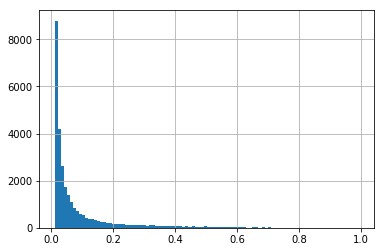

In [130]:
pd.Series(similarities[similarities > 0.01].values.reshape(len(similarities)**2)).hist(bins=100)

In [131]:
similarities_red = similarities[(similarities > 0.3)]

In [133]:
# number of edges
np.sum((similarities > 0.4).values)

1119

In [135]:
import networkx as nx

G = nx.Graph()

nodes = set()
edges = []

for r in similarities.index:
    for c in similarities.columns:
        if similarities.loc[r,c] > 0.3:
            nodes.update({r,c})
            edges.append((r,c))
    

In [136]:
G.add_edges_from(edges)
G.add_nodes_from(nodes)

In [137]:
nx.write_gexf(G,'data/vectorbasednetwork.gexf')

## Social Network

In [315]:
!pip install twython

    100% |████████████████████████████████| 133kB 4.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for twython ... done
  Stored in directory: /Users/kasparbeelen/Library/Caches/pip/wheels/54/0d/1d/17ead038ae99fc95a15469cab79fef102df2afc447405d0bf7
  Running setup.py bdist_wheel for oauthlib ... done
  Stored in directory: /Users/kasparbeelen/Library/Caches/pip/wheels/e5/46/f7/bb2fde81726295a13a71e3c6396d362ab408921c6562d6efc0
Successfully built twython oauthlib


In [342]:
!pip install tweepy

In [392]:
#https://galeascience.wordpress.com/2016/03/18/collecting-twitter-data-with-python/
import tweepy
from tweepy import OAuthHandler


CONSUMER_KEY = "pySu41ZdBJroflNyCgX3LYEYZ"
CONSUMER_SECRET = "CFMWOGRHjiAhAfGCciy7cpPfL4XmJx9JLEy2ALuolFYfGi84lk"
OAUTH_TOKEN = "758202931460055040-vRqoSopYQUPGotufXGhuwFJAg6dMJc0"
OAUTH_TOKEN_SECRET = "RQHnww6A3qgGHJ71XC74LSy35Fl3FLZNa93JbHF2a7aWK"

auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)


api = tweepy.API(auth)

In [401]:
tweets = tweepy.Cursor(api.search, '#MakeAmericaGreatAgain',lang='en',geo='50.8503,4.3517,3000km').items(1000)

In [338]:
#tweets = twitter.search(q='#MakeAmericaGreatAgain',lang='en',count=100)

In [402]:
tweets_list = []
for i in tweets:
    tweets_list.append(i._json)
    
print(len(tweets_list))

1000


In [405]:
tweets_list[0]['user']['id']

15416823

In [406]:
edges = []
nodes = set()

for tweet in tweets_list:
    u1,u2 = tweet['user']['id'],tweet['in_reply_to_user_id']
    if u1 and u2:
        nodes.update([u1,u2])
        edges.append((u1,u2))
        
edges_count = Counter(edges)
edges = [(u1,u2,{'weighted':freq}) for ((u1,u2),freq) in edges_count.items()]

In [389]:
print(tweets_list[0].get('coordinates',{'coordinates':0.0}))#.get('coordinates',[None])[0]

None


In [407]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.write_gexf(G,'data/social_network.gexf')

In [408]:
locations = json.load(open('data/locations.json'))

In [411]:
longs = [i['lon'] for i in locations]
latts = [i['lat'] for i in locations]

In [418]:
cd /Users/kasparbeelen/Downloads/basemap-1.0.7/

/Users/kasparbeelen/Downloads/basemap-1.0.7


In [420]:
!python setup.py install

checking for GEOS lib in /Users/kasparbeelen ....
checking for GEOS lib in /usr ....
checking for GEOS lib in /usr/local ....
GEOS lib (version 3.5.0) found in /usr/local
In file included from nad2bin.c:7:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
nad2bin.c:362:21: warning: comparison of integers of different signs: 'size_t' (aka 'unsigned long') and 'int' [-Wsign-compare]
                    != 4 * ct.lim.lam )
                    ^  ~~~~~~~~~~~~~~
2 warnings generated.
In file included from src/pj_malloc.c:5:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
/Users/kasparbeelen/anaconda3/lib/python3.6/distutils/dist.py:261: UserWarning: Unknown distribution option: 'namespace_packages'
  warnin

copying lib/mpl_toolkits/basemap/data/UScounties.shp -> build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data
copying lib/mpl_toolkits/basemap/data/README -> build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data
copying lib/mpl_toolkits/basemap/data/lsmask_1.25min_c.bin -> build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data
copying lib/mpl_toolkits/basemap/data/test83 -> build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data
copying lib/mpl_toolkits/basemap/data/gshhsmeta_f.dat -> build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data
copying lib/mpl_toolkits/basemap/data/lsmask_5min_h.bin -> build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data
copying lib/mpl_toolkits/basemap/data/nzgd2kgrid0005.gsb -> build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data
copying lib/mpl_toolkits/basemap/data/countriesmeta_c.dat -> build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data
copying lib/mpl_toolkits/basemap/data/lsmask_5min_i.bin -> build/lib.macosx-1

gcc: src/pj_apply_gridshift.c
In file included from src/pj_apply_gridshift.c:35:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/emess.c
gcc: src/pj_param.c
In file included from src/pj_param.c:2:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/PJ_nocol.c
In file included from src/PJ_nocol.c:2:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/PJ_eck4.c
In file included from src/PJ_eck4.c:2:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deall

gcc: src/PJ_lagrng.c
In file included from src/PJ_lagrng.c:7:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/PJ_denoy.c
In file included from src/PJ_denoy.c:2:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/nad_cvt.c
In file included from src/nad_cvt.c:2:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/PJ_laea.c
In file included from src/PJ_laea.c:13:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                      

2 warnings generated.
gcc: src/pj_tsfn.c
In file included from src/pj_tsfn.c:3:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/PJ_vandg4.c
In file included from src/PJ_vandg4.c:2:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/PJ_tmerc.c
In file included from src/PJ_tmerc.c:6:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/PJ_omerc.c
In file included from src/PJ_omerc.c:29:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids()

In file included from src/PJ_goode.c:5:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/PJ_aeqd.c
In file included from src/PJ_aeqd.c:41:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/pj_mutex.c
In file included from src/pj_mutex.c:34:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
src/pj_mutex.c:50:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
static void pj_init_lock();
                        ^
                         void
src/pj_mutex.c:50:13: warning: unused function 'pj_init_lock' [-Wun

1 warning generated.
gcc: src/PJ_ortho.c
In file included from src/PJ_ortho.c:6:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/PJ_urmfps.c
In file included from src/PJ_urmfps.c:4:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/pj_ell_set.c
In file included from src/pj_ell_set.c:2:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/p_series.c
In file included from src/p_series.c:2:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_gri

In file included from src/PJ_tpeqd.c:5:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/pj_zpoly1.c
In file included from src/pj_zpoly1.c:2:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/dmstor.c
In file included from src/dmstor.c:2:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/PJ_somerc.c
In file included from src/PJ_somerc.c:4:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
               

1 warning generated.
gcc: src/PJ_oea.c
In file included from src/PJ_oea.c:7:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/PJ_wag3.c
In file included from src/PJ_wag3.c:4:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/nad_intr.c
In file included from src/nad_intr.c:3:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/pj_gridcatalog.c
In file included from src/pj_gridcatalog.c:32:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_gr

In file included from src/PJ_august.c:2:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/adjlon.c
In file included from src/adjlon.c:3:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/rtodms.c
In file included from src/rtodms.c:2:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
                         void
1 warning generated.
gcc: src/pj_gridlist.c
In file included from src/pj_gridlist.c:33:
src/projects.h:478:25: warning: this function declaration is not a prototype [-Wstrict-prototypes]
void pj_deallocate_grids();
                        ^
               

src/_proj.c:7659:32: warning: unused function '__Pyx_PyUnicode_FromString' [-Wunused-function]
static CYTHON_INLINE PyObject* __Pyx_PyUnicode_FromString(char* c_str) {
                               ^
src/_proj.c:7789:29: warning: unused function '__Pyx_PyInt_AsSize_t' [-Wunused-function]
static CYTHON_INLINE size_t __Pyx_PyInt_AsSize_t(PyObject* x) {
                            ^
src/_proj.c:6495:27: warning: unused function '__Pyx_ErrRestore' [-Wunused-function]
static CYTHON_INLINE void __Pyx_ErrRestore(PyObject *type, PyObject *value, PyObject *tb) {
                          ^
src/_proj.c:6512:27: warning: unused function '__Pyx_ErrFetch' [-Wunused-function]
static CYTHON_INLINE void __Pyx_ErrFetch(PyObject **type, PyObject **value, PyObject **tb) {
                          ^
src/_proj.c:6892:36: warning: unused function '__Pyx_PyInt_AsUnsignedChar' [-Wunused-function]
static CYTHON_INLINE unsigned char __Pyx_PyInt_AsUnsignedChar(PyObject* x) {
                                   

building '_geoslib' extension
compiling C sources
C compiler: gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/Users/kasparbeelen/anaconda3/include -arch x86_64 -I/Users/kasparbeelen/anaconda3/include -arch x86_64

compile options: '-I/usr/local/include -I/Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/numpy/core/include -I/Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/numpy/core/include -I/Users/kasparbeelen/anaconda3/include/python3.6m -c'
gcc: src/_geoslib.c
In file included from src/_geoslib.c:254:
In file included from /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/numpy/core/include/numpy/ndarrayobject.h:18:
In file included from /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/numpy/core/include/numpy/ndarraytypes.h:1777:
/Users/kasparbeelen/anaconda3/lib/pyt

src/_geoslib.c:3343:23: warning: incompatible pointer types passing 'GEOSCoordSeq *' (aka 'struct GEOSCoordSeq_t **') to parameter of type 'GEOSCoordSequence *' (aka 'struct GEOSCoordSeq_t *'); dereference with * [-Wincompatible-pointer-types]
    GEOSCoordSeq_setX(__pyx_v_cs, __pyx_v_i, __pyx_v_dx);
                      ^~~~~~~~~~
                      *
/usr/local/include/geos_c.h:1242:58: note: passing argument to parameter 's' here
extern int GEOS_DLL GEOSCoordSeq_setX(GEOSCoordSequence* s,
                                                         ^
src/_geoslib.c:3352:23: warning: incompatible pointer types passing 'GEOSCoordSeq *' (aka 'struct GEOSCoordSeq_t **') to parameter of type 'GEOSCoordSequence *' (aka 'struct GEOSCoordSeq_t *'); dereference with * [-Wincompatible-pointer-types]
    GEOSCoordSeq_setY(__pyx_v_cs, __pyx_v_i, __pyx_v_dy);
                      ^~~~~~~~~~
                      *
/usr/local/include/geos_c.h:1244:58: note: passing argument to parameter 's' here

119 warnings generated.
gcc -bundle -undefined dynamic_lookup -L/Users/kasparbeelen/anaconda3/lib -arch x86_64 -L/Users/kasparbeelen/anaconda3/lib -arch x86_64 -arch x86_64 build/temp.macosx-10.7-x86_64-3.6/src/_geoslib.o -L/usr/local/lib -L/usr/local/lib64 -L/Users/kasparbeelen/anaconda3/lib -L/usr/local/lib -L/usr/local/lib64 -lgeos_c -lgeos -o build/lib.macosx-10.7-x86_64-3.6/_geoslib.cpython-36m-darwin.so
ld: warning: directory not found for option '-L/usr/local/lib64'
ld: warning: directory not found for option '-L/usr/local/lib64'
running install_lib
creating /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap
copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/shapefile.py -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap
copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/_proj.cpython-36m-darwin.so -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap
copying build/lib.ma

copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data/lsmask_10min_f.bin -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/data
copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data/gshhs_c.dat -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/data
copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data/countries_i.dat -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/data
copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data/countries_h.dat -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/data
copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data/riversmeta_h.dat -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/data
copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data/UScounties.shp -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_too

copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data/other.extra -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/data
copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data/UScounties.prj -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/data
copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data/statesmeta_f.dat -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/data
copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data/testIGNF -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/data
copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/basemap/data/epsg -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/data
copying build/lib.macosx-10.7-x86_64-3.6/mpl_toolkits/__init__.py -> /Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits
copying build/lib.macosx-10.7-x8

In [421]:
from mpl_toolkits.basemap import Basemap

/Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


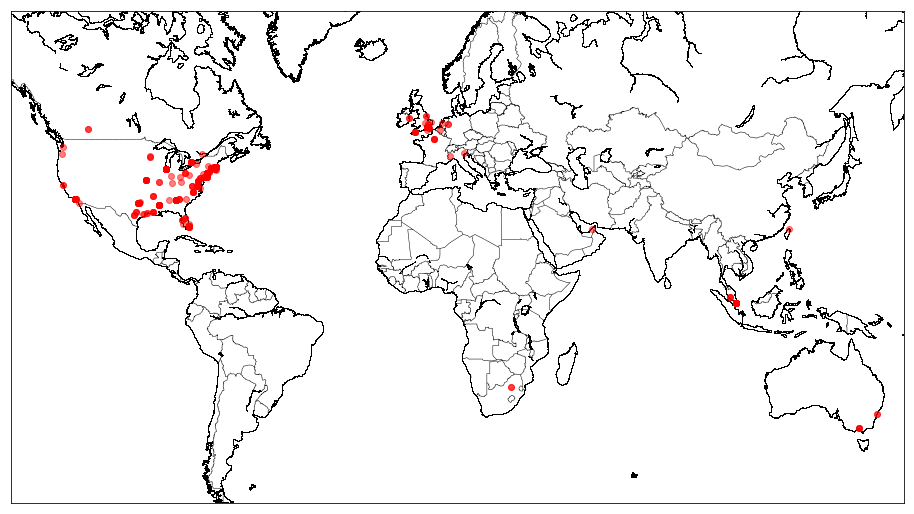

In [424]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16.0,10.0]

# plot the blank world map
my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                     resolution = 'h', area_thresh = 5000.0,
                     llcrnrlon=-140, llcrnrlat=-55,
                     urcrnrlon=160, urcrnrlat=70)
# set resolution='h' for high quality
 
# draw elements onto the world map
my_map.drawcountries()
#my_map.drawstates()
my_map.drawcoastlines(antialiased=False,
                      linewidth=0.005)
 
# add coordinates as red dots
x, y = my_map(longs, latts)
my_map.plot(x, y, 'ro', markersize=6, alpha=0.5)
 
plt.show()

/Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/kasparbeelen/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


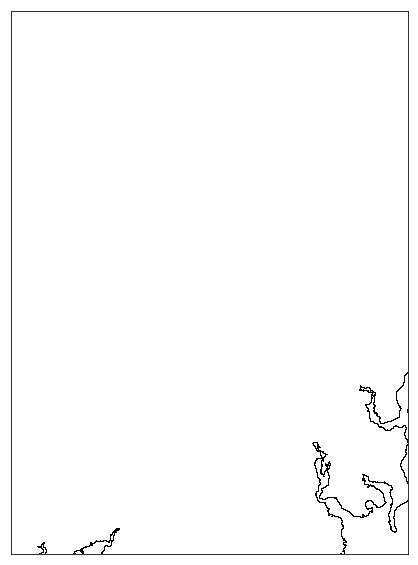

In [431]:
my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                     resolution = 'h', area_thresh = 5000.0,
                     llcrnrlon=117.1611, llcrnrlat=73.5673,
                     urcrnrlon=73.5673, urcrnrlat=45.5017)
# set resolution='h' for high quality
 
# draw elements onto the world map
my_map.drawcountries()
#my_map.drawstates()
my_map.drawcoastlines(antialiased=False,
                      linewidth=0.005)
 
# add coordinates as red dots
x, y = my_map(longs, latts)
my_map.plot(x, y, 'ro', markersize=6, alpha=0.5)
 
plt.show()

In [427]:
help(Basemap)

Help on class Basemap in module mpl_toolkits.basemap:

class Basemap(builtins.object)
 |  Methods defined here:
 |  
 |  __call__(self, x, y, inverse=False)
 |      Calling a Basemap class instance with the arguments lon, lat will
 |      convert lon/lat (in degrees) to x/y map projection
 |      coordinates (in meters).  If optional keyword ``inverse`` is
 |      True (default is False), the inverse transformation from x/y
 |      to lon/lat is performed.
 |      
 |      For cylindrical equidistant projection (``cyl``), this
 |      does nothing (i.e. x,y == lon,lat).
 |      
 |      For non-cylindrical projections, the inverse transformation
 |      always returns longitudes between -180 and 180 degrees. For
 |      cylindrical projections (self.projection == ``cyl``,
 |      ``cea``, ``mill``, ``gall`` or ``merc``)
 |      the inverse transformation will return longitudes between
 |      self.llcrnrlon and self.llcrnrlat.
 |      
 |      Input arguments lon, lat can be either sca